In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import nltk
import re
import string

In [4]:
#reading csv file
trdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/F3train.csv")

trdata = trdata.drop(["Id","title","subject","date"],axis=1)

trdata.head(10)

,text,label
0,"Paul Manafort, the chair of Donald Trump s cam...",1
1,How very charitable of the Lutheran and Cath...,1
2,In case you ve been living under a rock for yo...,1
3,PARIS (Reuters) - A court on Friday sentenced ...,0
4,PRAGUE (Reuters) - The Czech government will s...,0
5,Could this be a little bit of KARMA coming bac...,1
6,"Kansas education system is a mess, thanks to ...",1
7,I would hope that a wise Latina woman with th...,1
8,HOUSTON (Reuters) - U.S. President Donald Trum...,0
9,(Reuters) - Billionaire Carl Icahn will advise...,0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing Process

In [ ]:
def removeChar(text):
    if type(text) is str:
        text = text.lower()
        text = re.sub('!,?','',text)
        text = re.sub("'",'',text)
        text = re.sub('https?://\S+|www\.\S+','',text)
        text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopping(text):
  if type(text) is str:
     text = text.split()
     stops = set(stopwords.words("english"))
     text = [w for w in text if not w in stops]
     text = " ".join(text) 
  return text


#Preprocessing for training data
trdata['text'] = trdata['text'].apply(stopping)
trdata['text'] = trdata['text'].apply(removeChar) 
trdata.head(10)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,paul manafort chair donald trump campaign got ...,1
1,how charitable lutheran catholic churches brin...,1
2,in case living rock entire life especially cam...,1
3,paris reuters a court friday sentenced radica...,0
4,prague reuters the czech government seek vote...,0
5,could little bit karma coming back nasty comme...,1
6,kansas education system mess thanks republican...,1
7,i would hope wise latina woman richness experi...,1
8,houston reuters us president donald trump too...,0
9,reuters billionaire carl icahn advise donald ...,0


In [ ]:
x = trdata['text']
y = trdata['label']
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=6)


# Feature Extraction Process for training data
from sklearn.feature_extraction.text import TfidfVectorizer
Vec = TfidfVectorizer()
xf_train = Vec.fit_transform(x_train.astype(str))
xf_test = Vec.transform(x_test.astype(str))



# Logistic Regression 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
Log = LogisticRegression()
Log.fit(xf_train,y_train)
Log.score(xf_test,y_test)

0.9844724449535446

In [ ]:
Pred = Log.predict(xf_test)
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3745
           1       0.99      0.98      0.99      4112

    accuracy                           0.98      7857
   macro avg       0.98      0.98      0.98      7857
weighted avg       0.98      0.98      0.98      7857



In [ ]:

LR_MAPE = mean_absolute_error(y_test,Pred)
print(LR_MAPE)

2.5984409373284065




[[3700   45]
 [  77 4035]]




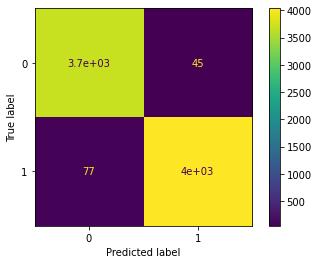

In [ ]:
plot_confusion_matrix(Log,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred))
print("\n")

# Support Vector Machines 

In [ ]:
from sklearn import svm
SuVeMa = svm.SVC(kernel='linear', gamma= 'auto', C=2)
SuVeMa.fit(xf_train,y_train)
SuVeMa.score(xf_test,y_test)

0.9936362479317806

In [ ]:
Pred1 = SuVeMa.predict(xf_test)
print(classification_report(y_test,Pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3745
           1       1.00      0.99      0.99      4112

    accuracy                           0.99      7857
   macro avg       0.99      0.99      0.99      7857
weighted avg       0.99      0.99      0.99      7857



In [ ]:
SVM_MAPE = mean_absolute_error(y_test,Pred1)
print(SVM_MAPE)

1.0835857252275252




[[3729   16]
 [  34 4078]]




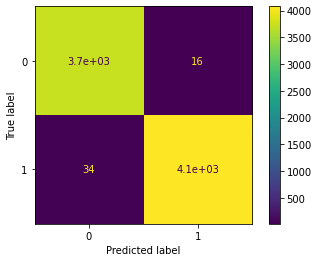

In [ ]:
plot_confusion_matrix(SuVeMa,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred1))
print("\n")

# K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xf_train,y_train)
knn.score(xf_test,y_test)

0.7042128038691613

In [ ]:
Pred2 = knn.predict(xf_test)
print(classification_report(y_test,Pred2))

              precision    recall  f1-score   support

           0       0.92      0.41      0.57      3745
           1       0.64      0.97      0.77      4112

    accuracy                           0.70      7857
   macro avg       0.78      0.69      0.67      7857
weighted avg       0.78      0.70      0.68      7857



In [ ]:
KNN_MAPE = mean_absolute_error(y_test,Pred2)
print(KNN_MAPE)

0.29578719613083876




[[1554 2191]
 [ 133 3979]]




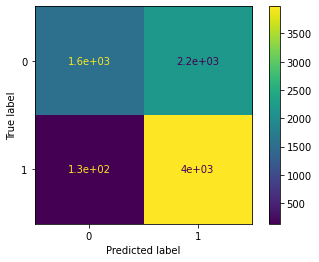

In [ ]:
plot_confusion_matrix(knn,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred2))
print("\n")

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xf_train,y_train)
dt.score(xf_test,y_test)

0.9935089728904162

In [ ]:
Pred4 = dt.predict(xf_test)
print(classification_report(y_test,Pred4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3745
           1       1.00      0.99      0.99      4112

    accuracy                           0.99      7857
   macro avg       0.99      0.99      0.99      7857
weighted avg       0.99      0.99      0.99      7857



In [ ]:
DTC_MAPE = mean_absolute_error(y_test,Pred4)
print(DTC_MAPE)

0.006491027109583811




[[3725   20]
 [  31 4081]]




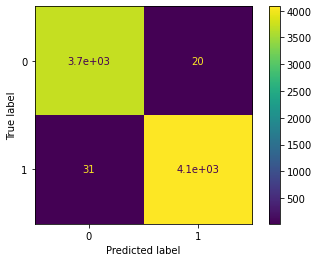

In [ ]:
plot_confusion_matrix(dt,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred4))
print("\n")

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(xf_train,y_train)
gb.score(xf_test,y_test)


0.9936362479317806

In [ ]:
Pred5 = gb.predict(xf_test)
print(classification_report(y_test,Pred5))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3745
           1       1.00      0.99      0.99      4112

    accuracy                           0.99      7857
   macro avg       0.99      0.99      0.99      7857
weighted avg       0.99      0.99      0.99      7857



In [ ]:
GBC_MAPE = mean_absolute_error(y_test,Pred5)
print(GBC_MAPE)

0.006363752068219423




[[3733   12]
 [  38 4074]]




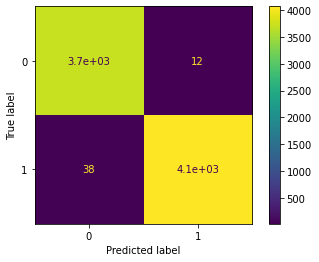

In [ ]:
plot_confusion_matrix(gb,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred5))
print("\n")

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(xf_train, y_train)
rf.score(xf_test,y_test)

0.9844724449535446

In [ ]:
Pred6 = rf.predict(xf_test)
print(classification_report(y_test,Pred6))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3745
           1       0.99      0.98      0.99      4112

    accuracy                           0.98      7857
   macro avg       0.98      0.98      0.98      7857
weighted avg       0.98      0.98      0.98      7857



In [ ]:
RFC_MAPE = mean_absolute_error(y_test,Pred6)
print(RFC_MAPE)

0.01552755504645539




[[3698   47]
 [  75 4037]]




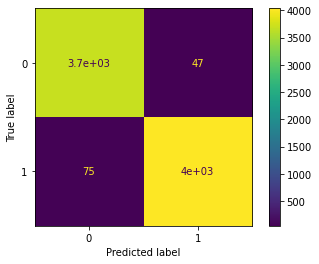

In [ ]:
plot_confusion_matrix(rf,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred6))
print("\n")

# Neural Networks 


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
wordsVec = 50000
oneHot = [one_hot(words,wordsVec)for words in trdata['text'].astype(str)]

In [ ]:
s_length = 20
embedded = pad_sequences(oneHot,padding='pre',maxlen=s_length)
print(embedded)

[[44981 18017 11547 ... 39078 45170 21153]
 [28092 16938 27881 ... 27881 35278  4807]
 [26839 30183 49179 ... 42440 44951 33999]
 ...
 [  396 28697 25070 ... 12249  6508 25294]
 [18896 33830 43382 ...  3817  2393 25996]
 [24483 38865 44739 ... 27184 38539 48112]]


In [ ]:
embedded_Vec_features = 40
model=Sequential()
model.add(Embedding(wordsVec,embedded_Vec_features,input_length=s_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X1 = np.array(embedded)
Y1 = np.array(y)
X1.shape,Y1.shape

((31428, 20), (31428,))

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=6)
History = model.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=20,batch_size=32)

Epoch 1/20
737/737 [==============================] - 34s 43ms/step - loss: 0.1885 - accuracy: 0.9216 - val_loss: 0.1029 - val_accuracy: 0.9635
Epoch 2/20
737/737 [==============================] - 31s 42ms/step - loss: 0.0419 - accuracy: 0.9859 - val_loss: 0.1213 - val_accuracy: 0.9595
Epoch 3/20
737/737 [==============================] - 31s 42ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.1435 - val_accuracy: 0.9579
Epoch 4/20
737/737 [==============================] - 32s 43ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.2043 - val_accuracy: 0.9542
Epoch 5/20
737/737 [==============================] - 31s 42ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.2483 - val_accuracy: 0.9570
Epoch 6/20
737/737 [==============================] - 31s 43ms/step - loss: 7.0397e-04 - accuracy: 0.9998 - val_loss: 0.2439 - val_accuracy: 0.9569
Epoch 7/20
737/737 [==============================] - 31s 42ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2269 - val_accur

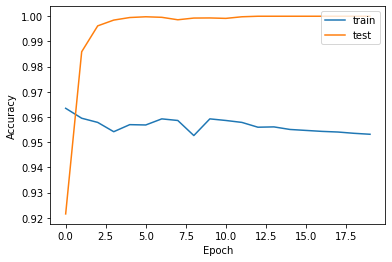

In [ ]:
import matplotlib.pyplot as plt
plt.plot(History.history['val_accuracy'])
plt.plot(History.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

# ROC and AUC For SVM and logistic Regression

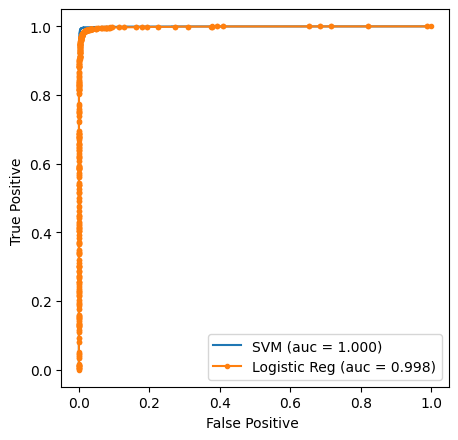

In [ ]:
Pred = Log.decision_function(xf_test)
Pred1 = SuVeMa.decision_function(xf_test)
#Pred6 = rf.decision_function(xf_test)
#Logistic Regression fpr,tpr
log_fpr, log_tpr, threshold = roc_curve(y_test, Pred)
auc_log = auc(log_fpr, log_tpr)

#SVM fpr,tpr
svm_fpr, svm_tpr, threshold = roc_curve(y_test, Pred1)
auc_svm = auc(svm_fpr, svm_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Reg (auc = %0.3f)' % auc_log)



plt.xlabel('False Positive ')
plt.ylabel('True Positive ')

plt.legend()

plt.show()